In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Constants definitions
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M_sole = 1.989e30  # Mass of the Sun (kg)
Gamma = 8 # GR parameter

In [13]:
# Definition of the differential equation for planetary motion
def planetary_motion(y, t):
    x, y, vx, vy = y
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sole * x / r**3 + Gamma * M_sole * x / r**4
    ay = -G * M_sole * y / r**3 + Gamma * M_sole * y / r**4
    return [vx, vy, ax, ay]

# Initial conditions
initial_position = [1.496e11, 0.0]  # Initial position of Earth relative to the Sun (m)
initial_velocity = [0.0, 2.978e4]  # Initial velocity of Earth relative to the Sun (m/s)
initial_state = initial_position + initial_velocity

# Number of points
num_points = 1000000

# Number of years
num_years = 500

# Definition of simulation time (365 days * num_years)
t = np.linspace(0, 365 * 24 * 3600 * num_years, num_points)  # From 0 to 365 days * num_years with num_points points

# Solving the differential equation
solution = odeint(planetary_motion, initial_state, t)

# Extracting x and y positions from the solution
x_positions = solution[:, 0]
y_positions = solution[:, 1]

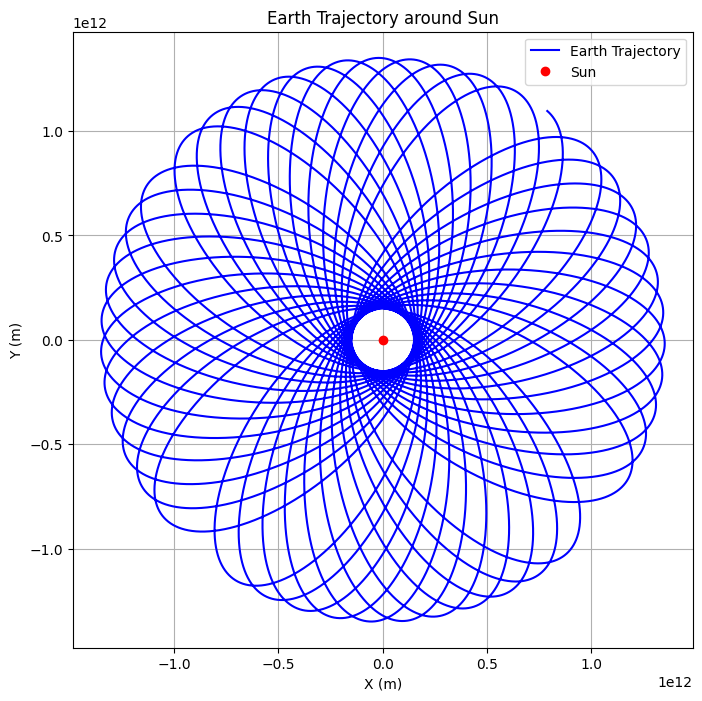

In [14]:
# Creating a 2D trajectory plot
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, label='Earth Trajectory', color='blue')
plt.plot(0, 0, 'ro', label='Sun')  # Position of the Sun
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Earth Trajectory around Sun')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensures that the x and y axes have the same scale
plt.show()